# Group 1

Fabio Ceruti - Fabio Martino - Alex Lucchini - Jacopo Biggiogera

This notebook contains the code used to produce the bar plots of the classification rates for both species and families predictions.

In [88]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [89]:
preds = pd.read_csv('final_logit.csv')
preds.head()

,Unnamed: 0,masked,sift,contrast,bright,species,path,vanilla,bbcontent,mixed,...,red,green,blue,average_0,average_1,average_2,diff_cont_red,diff_cont_green,diff_cont_blue,bbox_ratio
0,0,1,156,44.678057,122.619973,Pandion haliaetus,/content/drive/MyDrive/Animals_masked/Animals_...,1,1,1,...,75.529122,11.546985,28.336603,96.900701,142.450679,192.453651,-25.216641,15.383413,86.988780,16.103542
1,1,0,2784,76.915200,80.271130,Spinus tristis,/content/drive/MyDrive/Animals_masked/Animals_...,1,1,1,...,11.764276,0.255391,0.093554,123.198697,126.486752,101.010407,1.081354,-0.580514,-4.454465,18.777824
2,2,1,330,96.223408,195.855005,Pachydiplax longipennis,/content/drive/MyDrive/Animals_masked/Animals_...,1,1,1,...,50.937013,12.645696,16.546658,103.198176,109.649786,70.611125,-18.919167,-17.417480,-34.853747,8.251173
3,3,0,1671,92.882461,46.955006,Canis latrans,/content/drive/MyDrive/Animals_masked/Animals_...,0,0,0,...,32.302684,5.813796,10.957970,134.831277,132.248096,141.998666,12.713934,5.180830,36.533795,0.105000
4,4,0,3032,84.739734,85.638236,Trachemys scripta elegans,/content/drive/MyDrive/Animals_masked/Animals_...,1,0,0,...,9.112623,1.590392,14.203597,136.216462,127.411422,100.480382,14.099119,0.344155,-4.984490,14.478659


# Species Classification

In [90]:
species = set(preds['species'])
species = sorted(list(species))
print(species)
masked = []
vanilla = []
bbcontent = []
mixed = []

for i in range(len(species)):
    masked.append(len(preds[(preds['masked'] == 1)&(preds['species'] == species[i])])*100/len(preds.loc[preds['species'] == species[i], 'species']))
    vanilla.append(len(preds[(preds['vanilla'] == 1)&(preds['species'] == species[i])])*100/len(preds.loc[preds['species'] == species[i], 'species']))
    bbcontent.append(len(preds[(preds['bbcontent'] == 1)&(preds['species'] == species[i])])*100/len(preds.loc[preds['species'] == species[i], 'species']))
    mixed.append(len(preds[(preds['mixed'] == 1)&(preds['species'] == species[i])])*100/len(preds.loc[preds['species'] == species[i], 'species']))

['Anolis carolinensis', 'Canis latrans', 'Chelydra serpentina', 'Harmonia axyridis', 'Junonia coenia', 'Pachydiplax longipennis', 'Pandion haliaetus', 'Picoides pubescens', 'Procyon lotor', 'Sciurus carolinensis', 'Spinus tristis', 'Trachemys scripta elegans']


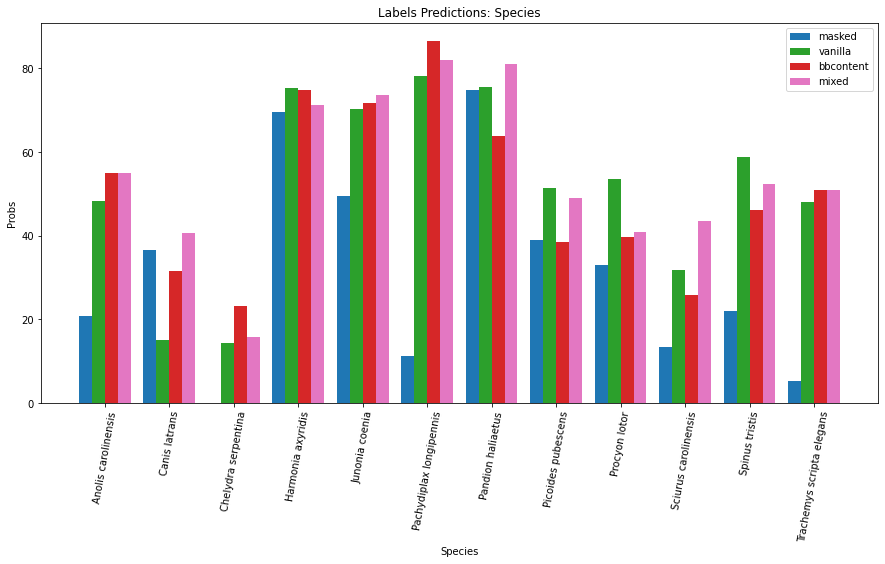

In [91]:
x = np.arange(12)
width = 0.2
plt.figure(figsize=(15, 7))
plt.bar(x - 0.3, masked, width, label = 'masked')
plt.bar(x - 0.1, vanilla, width, label = 'vanilla', color = '#2ca02c')
plt.bar(x + 0.1, bbcontent, width, label = 'bbcontent', color = '#d62728')
plt.bar(x + 0.3, mixed, width, label = 'mixed', color = '#e377c2')
plt.xticks(x, species)
plt.tick_params(axis = 'x', rotation = 80)
plt.xlabel('Species')
plt.ylabel('Probs')
plt.title('Labels Predictions: Species')
plt.legend()
plt.show()

As it's possible to see, overall the prediction accuracy is increasing when moving from the masked model to the mixed model. However, interestingly, the masked model performs very well for the species "Pandion haliaetus" and "Harmonia axyridis".

In [92]:
#Best predicted species by context
print(preds.loc[preds['species'] == species[6], 'species'].iloc[0])
print(preds.loc[preds['species'] == species[3], 'species'].iloc[0])
print(preds.loc[preds['species'] == species[4], 'species'].iloc[0])

Pandion haliaetus
Harmonia axyridis
Junonia coenia


In [93]:
#Worst predicted classes by context
print(preds.loc[preds['species'] == species[2], 'species'].iloc[0])
print(preds.loc[preds['species'] == species[11], 'species'].iloc[0])
print(preds.loc[preds['species'] == species[5], 'species'].iloc[0])
print(preds.loc[preds['species'] == species[9], 'species'].iloc[0])
print(preds.loc[preds['species'] == species[0], 'species'].iloc[0])

Chelydra serpentina
Trachemys scripta elegans
Pachydiplax longipennis
Sciurus carolinensis
Anolis carolinensis


# Families Classification

In [97]:
family = ['mammalia', 'aves', 'reptilia', 'insecta']

masked = []
vanilla = []
bbcontent = []
mixed = []

for i in range(len(family)):
    masked.append(len(preds[(preds['masked'] == 1)&(preds['family'] == family[i])])*100/len(preds.loc[preds['family'] == family[i], 'family']))
    vanilla.append(len(preds[(preds['vanilla'] == 1)&(preds['family'] == family[i])])*100/len(preds.loc[preds['family'] == family[i], 'family']))
    bbcontent.append(len(preds[(preds['bbcontent'] == 1)&(preds['family'] == family[i])])*100/len(preds.loc[preds['family'] == family[i], 'family']))
    mixed.append(len(preds[(preds['mixed'] == 1)&(preds['family'] == family[i])])*100/len(preds.loc[preds['family'] == family[i], 'family']))

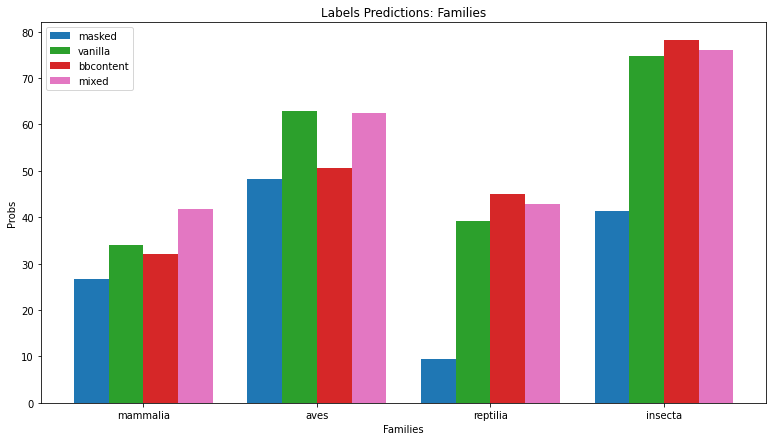

In [100]:
x = np.arange(4)
width = 0.2
plt.figure(figsize=(13, 7))
plt.bar(x - 0.3, masked, width, label = 'masked')
plt.bar(x - 0.1, vanilla, width, label = 'vanilla', color = '#2ca02c')
plt.bar(x + 0.1, bbcontent, width, label = 'bbcontent', color = '#d62728')
plt.bar(x + 0.3, mixed, width, label = 'mixed', color = '#e377c2')
plt.xticks(x, family)
plt.xlabel('Families')
plt.ylabel('Probs')
plt.title('Labels Predictions: Families')
plt.legend()
plt.show()

As it's possible to see, the trend is still increasing, and the masked model performs better for the "aves" family. On the other hand, when using the whole images, insects are almost perfectly predicted.